In [14]:
import pennylane as qml
import numpy as np
import torch
from torch import nn

In [20]:
dev =qml.device("default.qubit",wires=range(3))
@qml.qnode(dev, interface="torch")  # , diff_method="parameter-shift")
def quantum_circuit_n_qubit( x, theta):
    # Encoding circuit: rotate qubits based on input data (x, y)
    qml.AngleEmbedding(x, wires=[0, 1], rotation="X")
    # Parameterized quantum circuit with entanglement
    for layer_count in range(3):
        for i in range(2):
            qml.CNOT(wires=[i, i + 1])

        for i in range(3):
            qml.RY(theta[layer_count * 3 + i * 2 + 1], wires=i)


    ## 여기에서 grad 날라감 ㅅㅂ
    return [qml.expval(qml.PauliZ(i)) for i in range(3)]

(<Figure size 1300x400 with 1 Axes>, <Axes: >)


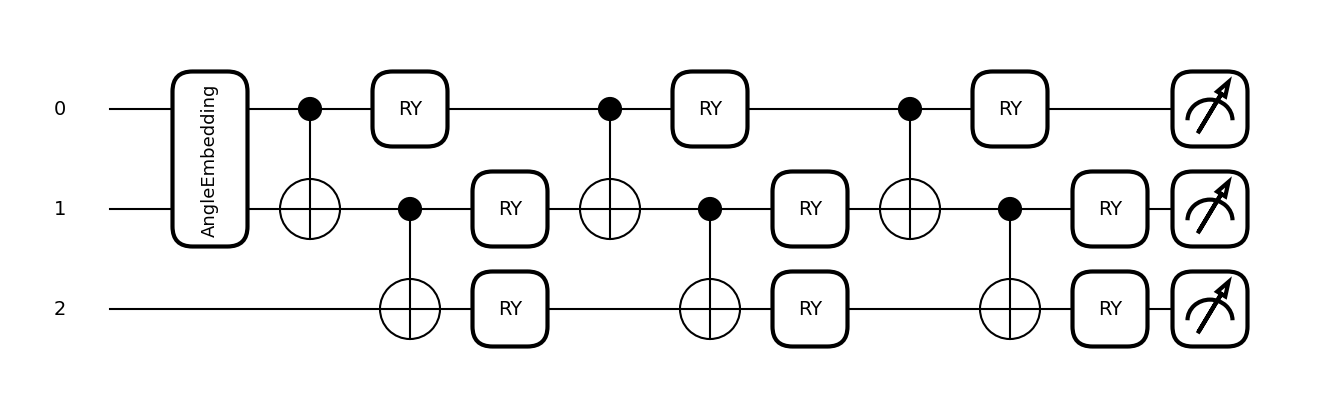

In [21]:
theta = nn.Parameter(
            torch.rand(3 * 3 * 2, dtype=torch.float32),
            requires_grad=True,
        )
x= torch.tensor([0.2,0.1])
print(qml.draw_mpl(quantum_circuit_n_qubit)(x,theta))


In [ ]:
class lemma1:
  def __init__(self,w,x,b):
    N_in =len(x)
    N= int(2**(np.ceil(np.log2(N_in+3))))
    A_x= np.sqrt(N_in - np.array(x)@np.array(x))
    A_wb=np.sqrt(N_in+1 -np.array(w)@np.array(w)-b**2)
    # Normalize the vectors

    v_x= [A_x] +x+[1]+[0 for _ in range(N-N_in-2)]
    v_wb =[0]+w+[b]+[0 for _ in range(N-N_in-3)]+[A_wb]

    self.v_x = np.array(v_x) /np.sqrt(N_in+1)
    self.v_wb = np.array(v_wb) /np.sqrt(N_in+1)
    self.N_in =N_in
    self.N =N
    self.n=int(np.log2(N))
    self.dev =qml.device("default.qubit",wires=range(n))

  def U_v(self, vec):
      qml.AmplitudeEmbedding(vec,wires=range(self.n),normalize=True)


  def circuit(self):
      @qml.qnode(device=self.dev)
      def inner_circuit():
        self.U_v(v_x)
        qml.adjoint(self.U_v)(v_wb)
        for i in range(self.n):
          qml.PauliX(i)
        return qml.state()
      print(qml.draw_mpl(inner_circuit)())
      return inner_circuit()




(<Figure size 600x400 with 1 Axes>, <Axes: >)


tensor([-0.59064131+4.25997132e-17j, -0.17836052-1.11214858e-17j,
         0.4099879 -1.44175044e-18j,  0.1816232 +2.14428538e-17j,
         0.37785582+3.77889042e-17j, -0.43106348-3.41696264e-17j,
        -0.29376614-2.42047080e-17j,  0.058     -1.86190061e-18j], requires_grad=True)

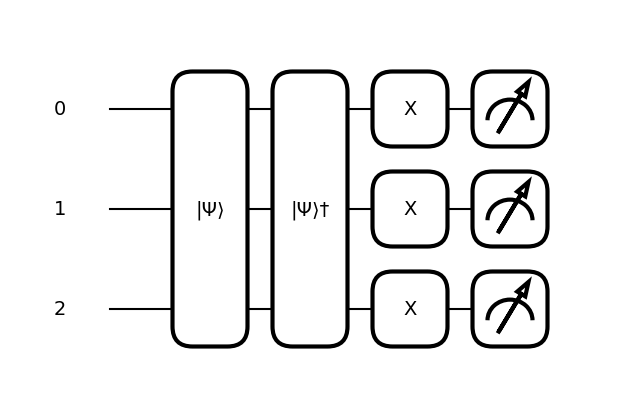

In [204]:
lemma=lemma1(x,w,b)
lemma.circuit()

In [ ]:
class Theoreom1:
  def __init__(self,w,x,b,d):
    N_in =len(x)
    N= int(2**(np.ceil(np.log2(N_in+3))))
    A_x= np.sqrt(N_in - np.array(x)@np.array(x))
    A_wb=np.sqrt(N_in+1 -np.array(w)@np.array(w)-b**2)
    # Normalize the vectors

    v_x= [A_x] +x+[1]+[0 for _ in range(N-N_in-2)]
    v_wb =[0]+w+[b]+[0 for _ in range(N-N_in-3)]+[A_wb]

    self.v_x = np.array(v_x) /np.sqrt(N_in+1)
    self.v_wb = np.array(v_wb) /np.sqrt(N_in+1)
    self.N_in =N_in
    self.N =N
    self.d =d
    self.n=int(np.log2(N))
    self.dev =qml.device("default.qubit",wires=range(n+d))

  def U_v(self, vec ):
      qml.AmplitudeEmbedding(vec,wires=range(self.n),normalize=True)


  def U_z(self, wires):
        self.U_v(self.v_x)
        qml.adjoint(self.U_v)(self.v_wb)
        for i in range(self.n):
          qml.PauliX(i)


  def V_i(self, i):
      a_m =i +self.n
      qml.ctrl(qml.Hadamard, control=range(self.n))(wires=a_m)
      for i in range(self.n):
          qml.CNOT(wires=[a_m,i])
      qml.ctrl(self.U_z, control=a_m)(wires=range(self.n))


  def circuit(self):
      @qml.qnode(device=self.dev)
      def inner_circuit():
        for i in range(self.n):
          qml.PauliX(wires=i)
        for i in range(self.d):
          self.V_i(i)
        return qml.state()
      print(qml.draw_mpl(inner_circuit)())
      return inner_circuit()




In [294]:
x= [0.1]
w= [0.8]
b=0.5

Th1=Theoreom1(x,w,b,1)


(<Figure size 1100x400 with 1 Axes>, <Axes: >)


tensor([ 0.        +0.j,  0.        +0.j,  0.26618904+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.38646738+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.48758216+0.j,  0.        +0.j,
         0.70710678+0.j,  0.        +0.j,  0.20506097+0.j,
         0.        +0.j], requires_grad=True)

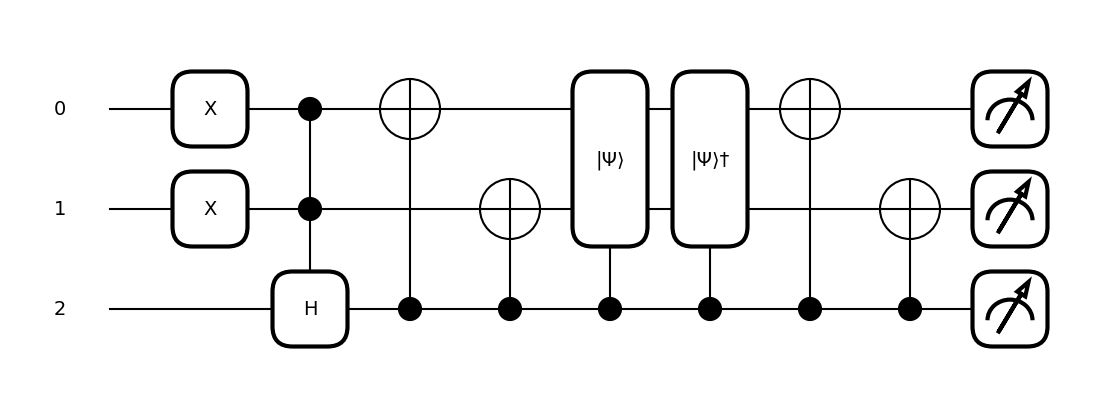

In [295]:
Th1.circuit()


In [296]:
z=v_wb@v_x

In [297]:
(1/2)**(1/2)*z**3

0.00013796501829086964